In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from textblob import TextBlob
import kaggle
from plotly.subplots import make_subplots
import plotly.graph_objects as go

print('All Libraries imported successfully')

All Libraries imported successfully


## Download the dataset from kaggle website using kaggle api


To use the kaggle API, you must have api tokken downloaded from kaggle profile and paste in the path "C:\Users\'Profile_Name'\.kaggle". Here Profile_Name is must changed with yours


In [2]:
data_set = 'shivamb/netflix-shows'
download_dir = r'C:\Users\Student\Data Analysis\Netflix_Analysis'

kaggle.api.authenticate()

kaggle.api.dataset_download_files(data_set, path=download_dir, unzip=True)
print('Data Set: %s downloaded successfully' %data_set)

Data Set: shivamb/netflix-shows downloaded successfully


In [3]:
df = pd.read_csv('netflix_titles.csv')

In [4]:
df.shape # shape 

(8807, 12)

In [5]:
df.info() # types of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.head() # for checking data content 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.columns # showing all column names

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
# to create pie-chart of content according to rating
rating_count = df.groupby(['rating']).size().reset_index(name='rating_count')
rating_count

,rating,rating_count
0,66 min,1
1,74 min,1
2,84 min,1
3,G,41
4,NC-17,3
5,NR,80
6,PG,287
7,PG-13,490
8,R,799
9,TV-14,2160


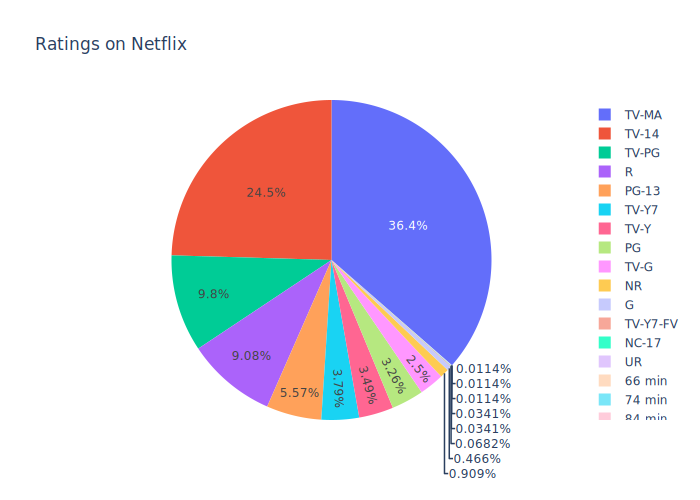

In [9]:
piechart = px.pie(rating_count,values='rating_count',names='rating',title='Ratings on Netflix')
piechart.show("svg")

In [10]:
df.isnull().sum() ## NAN or Null values in data

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
df['director'] = df['director'].fillna('Director not found')

In [12]:
df['director'].isnull().sum() ## checking Nan value in director column

0

## Analysis of Directors

In [13]:
directors_list = pd.DataFrame()
directors_list = df['director'].str.split(', ', expand=True).stack()
directors_list = directors_list.to_frame()
directors_list.columns = ['director']
directors = directors_list.groupby(['director']).size().reset_index(name='total_count')
directors
      

,director,total_count
0,A. L. Vijay,2
1,A. Raajdheep,1
2,A. Salaam,1
3,A.R. Murugadoss,2
4,Aadish Keluskar,1
...,...,...
4989,Éric Warin,1
4990,Ísold Uggadóttir,1
4991,Óskar Thór Axelsson,1
4992,Ömer Faruk Sorak,3


In [14]:
directors = directors[directors.director!= 'Director not found'] # delete the entity 'Director not Found'
directors = directors.sort_values(by=['total_count'],ascending=False)
top_directors = directors.head()
print(top_directors)

           director  total_count
3750  Rajiv Chilaka           22
1907      Jan Suter           21
3801    Raúl Campos           19
4458    Suhas Kadav           16
2867   Marcus Raboy           16


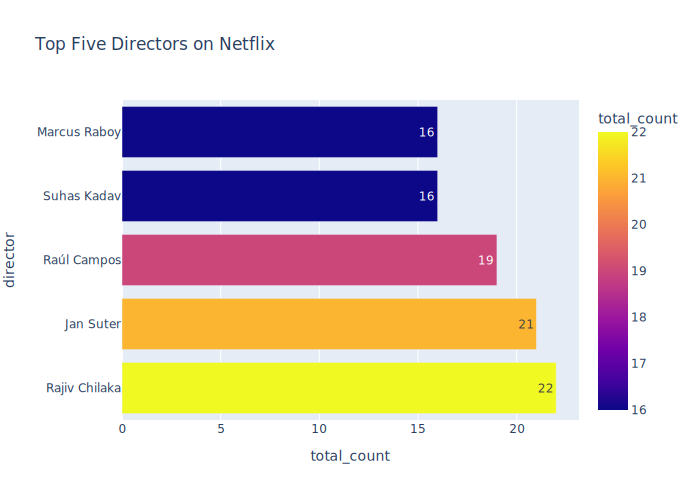

In [15]:
bar_chart = px.bar((directors.head()), x='total_count',y='director',title='Top Five Directors on Netflix',
                   color='total_count',text_auto=True)
bar_chart.show("svg")

## Analysis of Actors

In [16]:
df['cast'] = df['cast'].fillna('cast not found') # fill the whole cast column with 'Cast not found'
df['director'].isnull().sum() ## checking Nan value in cast column

0

                   actor  actors_count
2612         Anupam Kher            39
26941       Rupa Bhimani            31
30303   Takahiro Sakurai            30
15541      Julie Tejwani            28
23624            Om Puri            27
...                  ...           ...
31073         Tina Sáinz             1
31071         Tina Munim             1
31069        Tina Holmes             1
31068        Tina Haller             1
8955        Elsie Fisher             1

[39296 rows x 2 columns]


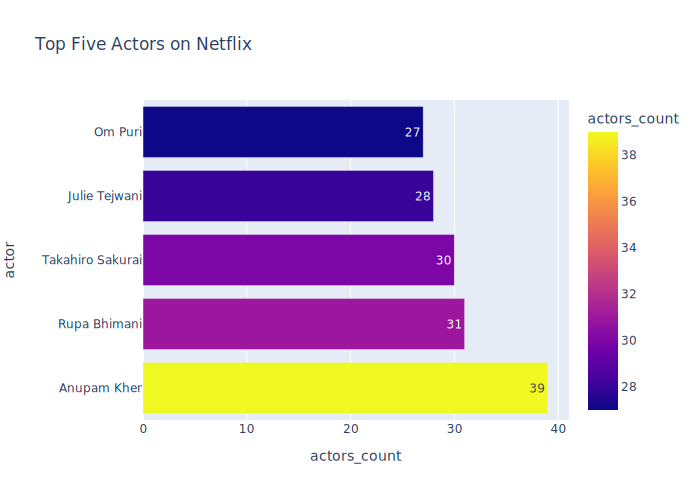

In [17]:
cast_list = pd.DataFrame()
cast_list = df['cast'].str.split(',', expand=True).stack()
cast_list = cast_list.to_frame()
cast_list.columns = ['actor']
actors_count = cast_list.groupby(['actor']).size().reset_index(name='actors_count')
actors_count = actors_count.sort_values(by=['actors_count'])
# actors_count = actors_count.drop([39283]) # delete cast not found 
actors_count = actors_count[actors_count.actor != 'cast not found'] # delete cast not found 
actors_count = actors_count.sort_values(by=['actors_count'],ascending=False)
top_actors = actors_count.head()
print(actors_count)
bar_chart1 = px.bar((actors_count.head()), x='actors_count',y='actor',title='Top Five Actors on Netflix',color='actors_count',
                   text_auto=True)
bar_chart1.show("svg")

## Analysis of content based on relasing years

In [18]:
print("Coulmn 'type' has ",df['type'].isnull().sum())
print("Coulmn 'release_year' has",df['release_year'].isnull().sum())# checking if type or release_year has null or Nan values

Coulmn 'type' has  0
Coulmn 'release_year' has 0


In [19]:
df1 = df[['type', 'release_year']]
df1

,type,release_year
0,Movie,2020
1,TV Show,2021
2,TV Show,2021
3,TV Show,2021
4,TV Show,2021
...,...,...
8802,Movie,2007
8803,TV Show,2018
8804,Movie,2009
8805,Movie,2006


In [20]:
total_count = df1.groupby(['type','release_year']).size().reset_index(name='total_count')
total_count

,type,release_year,total_count
0,Movie,1942,2
1,Movie,1943,3
2,Movie,1944,3
3,Movie,1945,3
4,Movie,1946,1
...,...,...,...
114,TV Show,2017,265
115,TV Show,2018,380
116,TV Show,2019,397
117,TV Show,2020,436


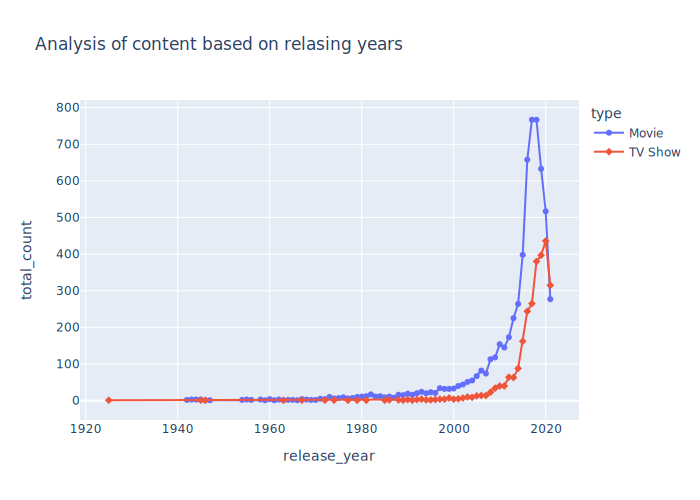

In [21]:
graph = px.line(total_count, x='release_year',y='total_count',color='type',markers=True,symbol="type",title='Analysis of content based on relasing years')
graph.show("svg")

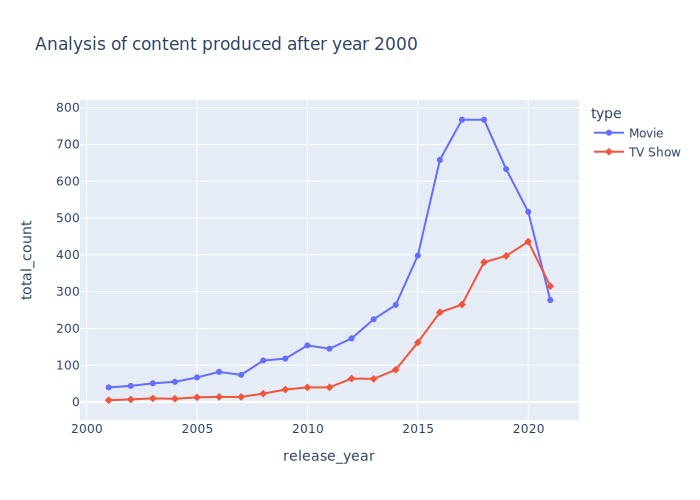

In [22]:
total_count = total_count[total_count['release_year']>2000]
graph1 = px.line(total_count, x='release_year',y='total_count',color='type',markers=True,symbol="type",title='Analysis of content produced after year 2000')
graph1.show("svg")

## Analysis of content produced by countries

In [23]:
print("Coulmn 'country' has ",df['country'].isnull().sum()) # checking if type or release_year has null or Nan values

Coulmn 'country' has  831


In [24]:
df['country'] = df['country'].fillna('country not found')
print("Coulmn 'country' has ",df['country'].isnull().sum())

Coulmn 'country' has  0


In [25]:
country_df = pd.DataFrame()
country_df = df['country'].str.split(', ',expand=True).stack()
country_df = country_df.to_frame()
country_df.columns = ['country']
print(country_df)
countries = country_df.groupby(['country']).size().reset_index(name='country_count')
print(countries)

                  country
0    0      United States
1    0       South Africa
2    0  country not found
3    0  country not found
4    0              India
...                   ...
8802 0      United States
8803 0  country not found
8804 0      United States
8805 0      United States
8806 0              India

[10845 rows x 1 columns]
               country  country_count
0                                   2
1          Afghanistan              1
2              Albania              1
3              Algeria              3
4               Angola              1
..                 ...            ...
123          Venezuela              4
124            Vietnam              7
125       West Germany              5
126           Zimbabwe              3
127  country not found            831

[128 rows x 2 columns]


In [26]:
countries = countries[countries.country != 'country not found'] # delete the entity 'Director not Found'
countries = countries.sort_values(by=['country_count'],ascending=False)
top_countries = countries.head()


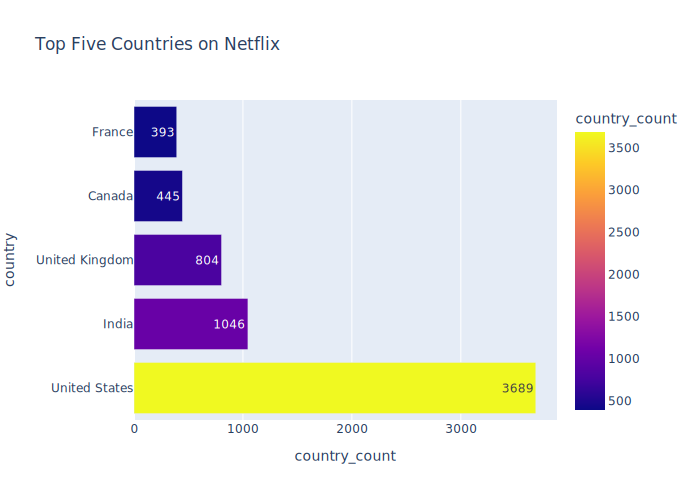

In [27]:
bar_chart2 = px.bar(countries.head(), x='country_count',y='country',title='Top Five Countries on Netflix',
                   color='country_count',text_auto=True)
bar_chart2.show("svg")

## Dashboard Code


                   actor  actors_count
2612         Anupam Kher            39
26941       Rupa Bhimani            31
30303   Takahiro Sakurai            30
15541      Julie Tejwani            28
23624            Om Puri            27


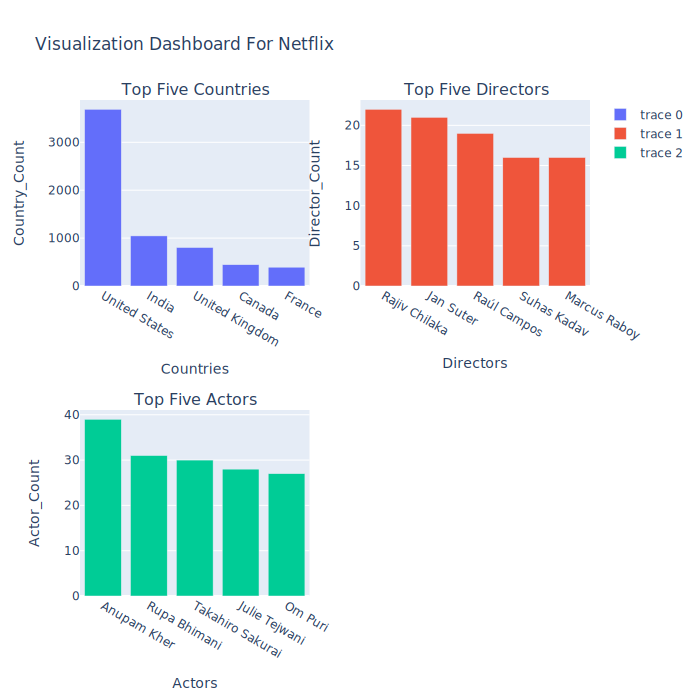

In [28]:


df = top_countries
df1 = top_directors
df2 = top_actors
# Create subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=['Top Five Countries', 'Top Five Directors', 'Top Five Actors'])

# Create bar graphs for each subplot using Plotly Express
fig.add_trace(go.Bar(x=df['country'], y=df['country_count']), row=1, col=1)
fig.add_trace(go.Bar(x=df1['director'], y=df1['total_count']), row=1, col=2)
fig.add_trace(go.Bar(x=df2['actor'], y=df2['actors_count']), row=2, col=1)

# Update subplot titles
fig.update_xaxes(title_text="Countries", row=1, col=1)
fig.update_yaxes(title_text="Country_Count", row=1, col=1)
fig.update_xaxes(title_text="Directors", row=1, col=2)
fig.update_yaxes(title_text="Director_Count", row=1, col=2)
fig.update_xaxes(title_text="Actors", row=2, col=1)
fig.update_yaxes(title_text="Actor_Count", row=2, col=1)

# Update layout and show plot
fig.update_layout(title_text="Visualization Dashboard For Netflix",height=700,width=700)
fig.show('svg')
